In [72]:
#!pip install camel-tools
#!pip install nltk
#!pip install emoji
#!pip install regex
#!pip install advertools
#!pip install translate
#!pip install textblob
#!pip install spacy-langdetect
#!pip install langid

In [108]:
import pandas as pd
import re
import string
import spacy
import camel_tools
import nltk
nltk.download('punkt')
import emoji
import regex
import advertools as adv
import matplotlib.pyplot as plt
import spacy
from spacy_langdetect import LanguageDetector
from langdetect import detect

[nltk_data] Downloading package punkt to /Users/maha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [109]:
#helper functions

def tokenize_word(text):
    text=str(text)
    return nltk.word_tokenize(text)
    
    
def emoji_count(text):
    text=[str(text)]
    emoji_summary = adv.extract_emoji(text)
    return emoji_summary['emoji_counts'][0]



def convert_emoji_to_text(text):
    text=str(text)
    return emoji.demojize(text, delimiters=(" ", " "))



def change_emoji_description(mylist):
    translator= Translator(from_lang="english",to_lang="arabic")
    for i in range(len(mylist)):
        if(langid.classify(mylist[i])[0]=='en'):
            mylist[i]='ايموجي'
    return mylist

In [110]:
df=pd.read_csv("NLP_data.csv")
df.head(3)

,Tweet,Type
0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,1.0
1,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,1.0
2,عفوا موقع ابشر لما اضغط ع تسجيل مواليد يقولي ل...,1.0


<AxesSubplot:>

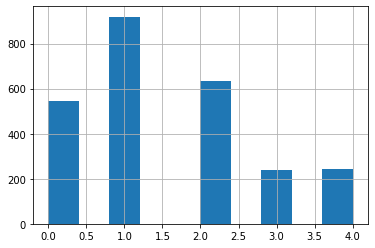

In [111]:
df['Type'].hist()

In [112]:
df['emoji']=df['Tweet'].apply(emoji_count)

In [113]:
df['emoji'].value_counts()

0     2132
1      131
4       97
2       94
10      31
6       25
3       25
9       21
5        8
8        5
7        5
12       2
16       2
Name: emoji, dtype: int64

In [114]:
tweets_without_emoji=df.loc[df['emoji']<2]
tweets_without_emoji['Type'].value_counts()

1.0    917
2.0    631
0.0    344
3.0    232
4.0    139
Name: Type, dtype: int64

([<matplotlib.axis.XTick at 0x7fca7c114700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

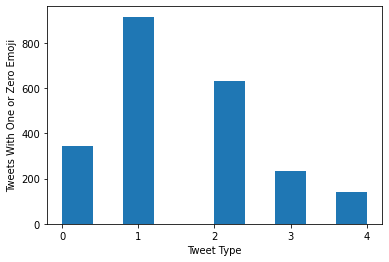

In [115]:
plt.hist(tweets_without_emoji['Type'])
plt.xlabel('Tweet Type')
plt.ylabel('Tweets With One or Zero Emoji')
plt.xticks([0,1,2,3,4])

In [116]:
tweets_with_emoji=df.loc[df['emoji']>1]
tweets_with_emoji['Type'].value_counts()

0.0    199
4.0    106
3.0      6
1.0      2
2.0      1
Name: Type, dtype: int64

([<matplotlib.axis.XTick at 0x7fca7f393f40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

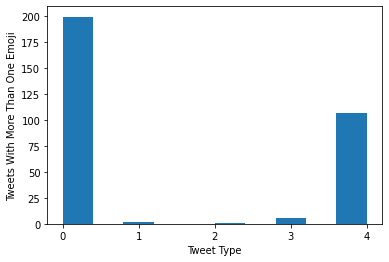

In [117]:
plt.hist(tweets_with_emoji['Type'])
plt.xlabel('Tweet Type')
plt.ylabel('Tweets With More Than One Emoji')
plt.xticks([0,1,2,3,4])

most tweets that have emojis are of category = 1 which is 'noise' so the information of emoji is helpful in classification thus should not be removed, instead we will put the word explaining them

In [118]:
df['Cleaned_Tweet']=df['Tweet'].apply(convert_emoji_to_text)

In [119]:
df['Tokens']=df['Cleaned_Tweet'].apply(tokenize_word)

#### EDA

In [120]:
df.head(2)

,Tweet,Type,emoji,Cleaned_Tweet,Tokens
0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,1.0,0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,"[السلام, عليكم, لدي, عامل, انتهي, جواز, السفر,..."
1,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,1.0,0,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,"[سلام, عليكم, عندي, اضافه, مولود, ولما, ادخل, ..."


Now we will translate each english word that is result from emoji description to arabic 

In [121]:
df['Translated_Tokens']=df['Tokens'].apply(change_emoji_description)

In [124]:
df.head(2)

,Tweet,Type,emoji,Cleaned_Tweet,Tokens,Translated_Tokens
0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,1.0,0,السلام عليكم لدي عامل انتهي جواز السفر وتم تجد...,"[السلام, عليكم, لدي, عامل, انتهي, جواز, السفر,...","[السلام, عليكم, لدي, عامل, انتهي, جواز, السفر,..."
1,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,1.0,0,سلام عليكم عندي اضافه مولود ولما ادخل ابشر واض...,"[سلام, عليكم, عندي, اضافه, مولود, ولما, ادخل, ...","[سلام, عليكم, عندي, اضافه, مولود, ولما, ادخل, ..."


In [90]:
# what are the  most common words in each category?

In [8]:
#SPacy (most common words in each category)

In [9]:
#unique words

In [ ]:
#adding scrapped more data

In [11]:
#Dimensionality reduction SVM,PCA

In [4]:
#delete arabic stop words(not sure)

In [ ]:
#fitting model

In [5]:
#CoreEX

In [6]:
#Topic Modeling